## Cleaning of CustomerDemographic data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
CDemographic = pd.read_excel('CustomerDemographic_table.xlsx')

In [3]:
CDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
CDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
CDemographic['last_name']=CDemographic['last_name'].fillna(method='ffill')

In [6]:
CDemographic['DOB']=CDemographic['DOB'].fillna(method='ffill')

In [7]:
CDemographic['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Database Administrator II                4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [8]:
CDemographic['job_title']=CDemographic['job_title'].fillna(method='bfill')

In [9]:
CDemographic['job_industry_category'] =CDemographic['job_industry_category'].fillna(method='ffill')

In [12]:
CDemographic['job_industry_category'].value_counts()

Manufacturing         959
Financial Services    926
Health                720
Retail                433
Property              320
IT                    273
Entertainment         158
Argiculture           129
Telecommunications     82
Name: job_industry_category, dtype: int64

In [14]:
del CDemographic['default']

In [15]:
CDemographic['tenure'].mean()

10.65704063378482

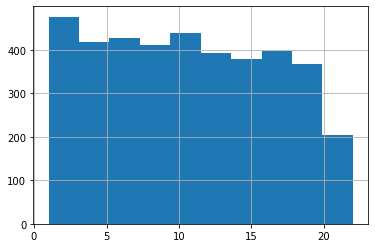

In [18]:
CDemographic['tenure'].hist()

In [19]:
CDemographic['tenure'] =CDemographic['tenure'].fillna(CDemographic['tenure'].mean())

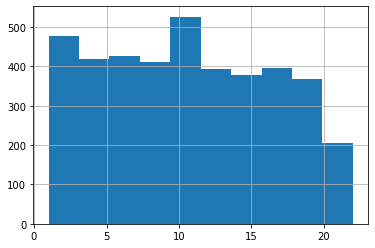

In [20]:
CDemographic['tenure'].hist()

In [21]:
final_CustomerDemographic= pd.DataFrame({
        "customer_id": CDemographic["customer_id"],
        "first_name": CDemographic["first_name"],
        "last_name": CDemographic["last_name"],
        "gender":CDemographic["gender"],
        "past_3_years_bike_related_purchases": CDemographic["past_3_years_bike_related_purchases"],
        "DOB": CDemographic["DOB"],
        "job_title": CDemographic["job_title"],
        "job_industry_category": CDemographic["job_industry_category"],
        "wealth_segment": CDemographic["wealth_segment"],
        "deceased_indicator": CDemographic["deceased_indicator"],
        "owns_car": CDemographic["owns_car"],
        "tenure": CDemographic["tenure"]
    })
final_CustomerDemographic.to_csv('./final_CustomerDemographic.csv', index=False)

In [22]:
final_CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0


In [23]:
final_CustomerDemographic.shape

(4000, 12)